# 把 tf 裡面若干 active functions 畫成圖形來看
When I read "TensorFlow in a Nutshell" series article (Ynote: "TensorFlow in a Nutshell — Part One Two Three–Camron's Blog") I feel the need to review Morvan's tf. So I do it now but with jupyter notebook.

In [6]:
import peforth

In [7]:
%%f if playing in jupyter notebook 
\ Now we redefine the 'unknown' command that does nothing at default  
: unknown ( token -- thing Y|N) // Try to find the unknown token in __main__
  py> getattr(sys.modules['__main__'],pop(),"Ûnknôwn") 
  py> str(tos())=="Ûnknôwn" if drop false else true then ;
  /// here after, when FORTH come accross an unknown token, instead of alerting 
  /// it try to find the token in python __main__ module name space.
: path-to-find-modules ( <path> -- ) // Add path to sys.path so "import module-name" can find the module
    CR word trim ( "path" ) py: sys.path.append(pop()) ;
code # print(nexttoken('\n')) end-code // Redefine \ command to print the comment line 


reDef unknown


In [1]:
"""
Know more, visit my Python tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
tensorflow: 1.1.0
matplotlib

把幾個 Activation Function 都畫了出來.

"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# x-axis 
x = np.linspace(-5, 5, 200)     # x data, shape=(100, 1)
%f x :> [:10] tib. \ 看看前幾個 

x :> [:10] tib. \ ==> [-5.         -4.94974874 -4.89949749 -4.84924623 -4.79899497 -4.74874372
 -4.69849246 -4.64824121 -4.59798995 -4.54773869] (<class 'numpy.ndarray'>)


In [16]:
# following are popular activation functions
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)
# y_softmax = tf.nn.softmax(x)  # softmax is a special kind of
                                # activation function, it is about probability
%f y_relu tib.
%f y_softplus tib.

y_relu tib. \ ==> Tensor("Relu_5:0", shape=(200,), dtype=float64) (<class 'tensorflow.python.framework.ops.Tensor'>)
y_softplus tib. \ ==> Tensor("Softplus_5:0", shape=(200,), dtype=float64) (<class 'tensorflow.python.framework.ops.Tensor'>)


In [17]:
sess = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])
    # 前幾課 202 placeholder 處講過用 tf.assign() 來佈線做成回路。
    # 這裡 run 完又塞給自己，因為 y_relu 本來是 op 之後就變成 array 不能再跑了。

%f y_relu :> [-20:] tib.
%f y_sigmoid :> [-20:] tib.
%f y_tanh :> [-20:] tib.
%f y_softplus :> [-20:] tib.


y_relu :> [-20:] tib. \ ==> [4.04522613 4.09547739 4.14572864 4.1959799  4.24623116 4.29648241
 4.34673367 4.39698492 4.44723618 4.49748744 4.54773869 4.59798995
 4.64824121 4.69849246 4.74874372 4.79899497 4.84924623 4.89949749
 4.94974874 5.        ] (<class 'numpy.ndarray'>)
y_sigmoid :> [-20:] tib. \ ==> [0.98279543 0.98362481 0.98441485 0.98516734 0.98588402 0.98656654
 0.98721649 0.98783539 0.98842467 0.98898572 0.98951987 0.99002837
 0.99051244 0.99097323 0.99141182 0.99182929 0.99222662 0.99260477
 0.99296466 0.99330715] (<class 'numpy.ndarray'>)
y_tanh :> [-20:] tib. \ ==> [0.99938729 0.99944586 0.99949883 0.99954674 0.99959007 0.99962926
 0.9996647  0.99969676 0.99972575 0.99975197 0.99977568 0.99979713
 0.99981652 0.99983407 0.99984993 0.99986428 0.99987726 0.99988899
 0.99989961 0.9999092 ] (<class 'numpy.ndarray'>)
y_softplus :> [-20:] tib. \ ==> [4.06258042 4.11198813 4.16143652 4.21092367 4.26044771 4.31000691
 4.35959959 4.40922413 4.45887903 4.50856282 4.55827413 4.608

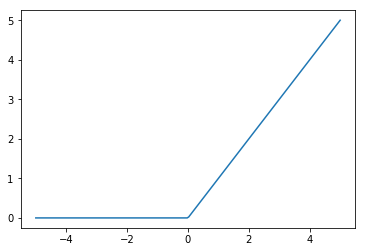

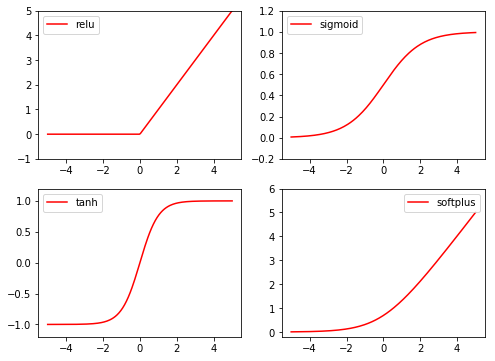

In [2]:
# 試試最簡式, 沒錯, 就這樣, 其他都是周邊的東西.
plt.plot(x, y_relu)
plt.show()

# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()